Question 1 [7 points]

Develop NLP models for sentiment analysis (predicting whether a sentence is positive or negative meaning) using the following dataset. You should develop at least two models (tokenizer/word embedding) using RNN/LSTM/GRU/BERT/etc and compare their performance.
- Use the IMDB movie review dataset to train the models.
- Test the model performances using a part of the IMDB review dataset
- Test the model performances using a part of the amazon review dataset
- IMDB review Dataset: https://www.kaggle.com/jcblaise/imdb-sentiments
- Amazon review Dataset: http://jmcauley.ucsd.edu/data/amazon/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Conv1D
from keras.layers import LSTM
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
test = pd.read_csv("/content/drive/My Drive/imdb-sentiments/test.csv")
train = pd.read_csv("/content/drive/My Drive/imdb-sentiments/train.csv")

In [3]:
train.head()

,text,sentiment
0,For a movie that gets no respect there sure ar...,0
1,Bizarre horror movie filled with famous faces ...,0
2,"A solid, if unremarkable film. Matthau, as Ein...",0
3,It's a strange feeling to sit alone in a theat...,0
4,"You probably all already know this by now, but...",0


In [4]:
test.head()

,text
0,This movie was horrible. If it had never been ...
1,The director infuses this film with false dept...
2,"I don't get it! The teenage leads in ""Horror S..."
3,"This is the fifth part of 'The Animatrix', a c..."
4,I was very impressed with with this film which...


In [5]:
print(train.shape)
print(test.shape)

(25000, 2)
(11001, 1)


In [6]:
train.loc[0]['text']

'For a movie that gets no respect there sure are a lot of memorable quotes listed for this gem. Imagine a movie where Joe Piscopo is actually funny! Maureen Stapleton is a scene stealer. The Moroni character is an absolute scream. Watch for Alan "The Skipper" Hale jr. as a police Sgt.'

In [7]:
test.loc[0]['text']

"This movie was horrible. If it had never been made the world would be a better place. Come on, a flying wagon? What were they thinking? This was a sub-par movie with a horrible hook, and I would like a written apology from the studio that produced this, along with some cookies to help repay me for the time I wasted on this crap fest that I can never get back. If you payed to see this movie, I am truly sorry because I watched it on TV on a Sunday afternoon when I had nothing better to do and it pretty much ruined my whole week. A flying freaking WAGON?!?! And that's supposed to make up for having a horrible mother who cares more about her own screwed up needs than her children? No wonder they don't have enough sense to tell someone he is beating them, their mother teaches them nothing but that what she wants comes before everything else. Absolutely horrible."

In [0]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in train]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in train]
    
    return reviews

train_clean = preprocess_reviews(train)
test_clean = preprocess_reviews(test)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
maxlen = 80
tk = Tokenizer()
tk.fit_on_texts(train_clean)
index_list = tk.texts_to_sequences(train_clean)
train_clean = pad_sequences(index_list, maxlen=maxlen)

tk.fit_on_texts(test_clean)
index_listt = tk.texts_to_sequences(test_clean)
test_clean = pad_sequences(index_listt, maxlen=maxlen)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_clean, test_clean, test_size=0.2, random_state=0)

In [11]:
# first model
model = Sequential()

model.add(Dense(64, input_dim=80, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(80, activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                5184      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
Total params: 17,572
Trainable params: 17,572
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train,batch_size=10,epochs=50,validation_data=(X_test, y_test))

Train on 1 samples, validate on 1 samples
Epoch 1/50
1/1 [==============================] - 0s 151ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0496 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0124 - accuracy: 0.0000e+00 - val_loss: 0.0495 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0494 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0493 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0123 - accuracy: 0.0000e+00 - val_loss: 0.0493 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.0122 - a

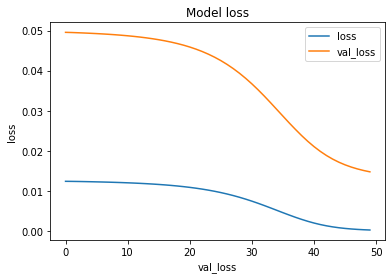

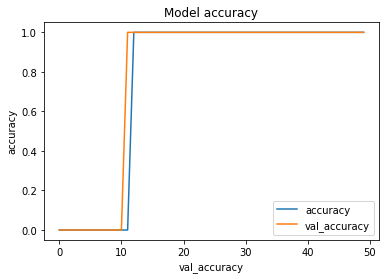

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

In [15]:
# second model
ls_model = Sequential()
ls_model.add(Embedding(100, 128))
ls_model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
ls_model.add(Dense(100, activation='relu'))
ls_model.add(Dense(80, activation='sigmoid'))
ls_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         12800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               12900     
_________________________________________________________________
dense_7 (Dense)              (None, 80)                8080      
Total params: 165,364
Trainable params: 165,364
Non-trainable params: 0
_________________________________________________________________


In [16]:
ls_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

ls_history = ls_model.fit(X_train, y_train,batch_size=10,epochs=50,validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1 samples, validate on 1 samples
Epoch 1/50
1/1 [==============================] - 1s 528ms/step - loss: 0.6946 - accuracy: 0.4625 - val_loss: 0.6913 - val_accuracy: 0.5625
Epoch 2/50
1/1 [==============================] - 0s 72ms/step - loss: 0.6911 - accuracy: 0.6125 - val_loss: 0.6886 - val_accuracy: 0.6500
Epoch 3/50
1/1 [==============================] - 0s 56ms/step - loss: 0.6880 - accuracy: 0.6500 - val_loss: 0.6855 - val_accuracy: 0.6750
Epoch 4/50
1/1 [==============================] - 0s 53ms/step - loss: 0.6865 - accuracy: 0.7125 - val_loss: 0.6817 - val_accuracy: 0.7125
Epoch 5/50
1/1 [==============================] - 0s 56ms/step - loss: 0.6807 - accuracy: 0.7250 - val_loss: 0.6768 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 0s 55ms/step - loss: 0.6751 - accuracy: 0.7375 - val_loss: 0.6701 - val_accuracy: 0.7500
Epoch 7/50
1/1 [==============================] - 0s 65ms/step - loss: 0.6708 - accuracy: 0.7500 - val_loss: 0.6605 - val_a

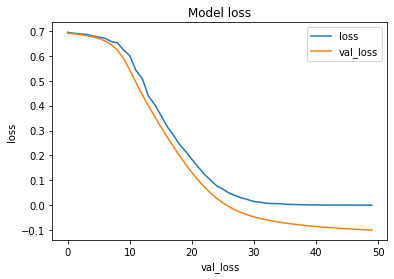

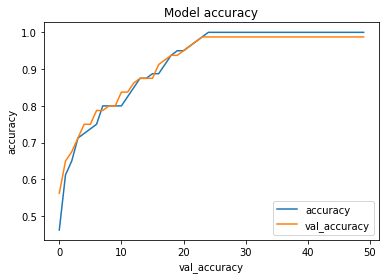

In [17]:
plt.plot(ls_history.history['loss'])
plt.plot(ls_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

plt.plot(ls_history.history['accuracy'])
plt.plot(ls_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

In [19]:
# third model
cnnmodel = Sequential()

cnnmodel.add(Embedding(200,200, input_length=maxlen))
cnnmodel.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Dense(200, activation = 'relu'))
cnnmodel.add(Dense(150, activation = 'relu'))
cnnmodel.add(Dense(100, activation = 'relu'))
cnnmodel.add(Dense(80, activation = 'sigmoid'))

cnnmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 200)           40000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_9 (Dense)              (None, 150)               30150     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_11 (Dense)             (None, 80)               

In [20]:
cnnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

cnnhistory = cnnmodel.fit(X_train, y_train, batch_size=20, epochs=50, validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1 samples, validate on 1 samples
Epoch 1/50
1/1 [==============================] - 1s 623ms/step - loss: 0.6935 - accuracy: 0.4625 - val_loss: 0.6917 - val_accuracy: 0.6500
Epoch 2/50
1/1 [==============================] - 0s 104ms/step - loss: 0.6915 - accuracy: 0.6625 - val_loss: 0.6893 - val_accuracy: 0.6875
Epoch 3/50
1/1 [==============================] - 0s 93ms/step - loss: 0.6898 - accuracy: 0.7125 - val_loss: 0.6857 - val_accuracy: 0.7000
Epoch 4/50
1/1 [==============================] - 0s 103ms/step - loss: 0.6859 - accuracy: 0.7250 - val_loss: 0.6802 - val_accuracy: 0.6875
Epoch 5/50
1/1 [==============================] - 0s 102ms/step - loss: 0.6815 - accuracy: 0.7500 - val_loss: 0.6710 - val_accuracy: 0.7125
Epoch 6/50
1/1 [==============================] - 0s 108ms/step - loss: 0.6748 - accuracy: 0.7250 - val_loss: 0.6545 - val_accuracy: 0.7250
Epoch 7/50
1/1 [==============================] - 0s 97ms/step - loss: 0.6552 - accuracy: 0.7625 - val_loss: 0.6246 - v

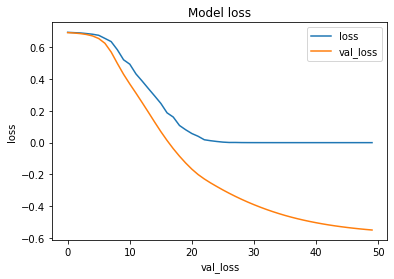

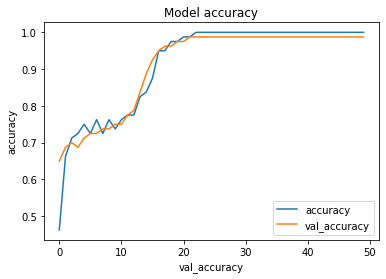

In [21]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()